# Gym Members Exercise Tracking - Exploratory Data Analysis
## This notebook provides an in-depth exploration of gym members' exercise routines, physical attributes, and fitness metrics.

## Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Inspect the Data

In [2]:
# Load the dataset and inspect its structure to understand available features.
file_path = '/kaggle/input/gym-members-exercise-dataset/gym_members_exercise_tracking.csv'
gym_data = pd.read_csv(file_path)

# Display the first few rows of the dataset for an initial overview
gym_data.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


## Check for Missing Values and Basic Statistics

In [3]:
# Check for any missing values in the dataset and generate summary statistics for numerical columns.
missing_values = gym_data.isnull().sum()
stats_summary = gym_data.describe()

# Display missing values and basic statistics summary
missing_values, stats_summary

(Age                              0
 Gender                           0
 Weight (kg)                      0
 Height (m)                       0
 Max_BPM                          0
 Avg_BPM                          0
 Resting_BPM                      0
 Session_Duration (hours)         0
 Calories_Burned                  0
 Workout_Type                     0
 Fat_Percentage                   0
 Water_Intake (liters)            0
 Workout_Frequency (days/week)    0
 Experience_Level                 0
 BMI                              0
 dtype: int64,
               Age  Weight (kg)  Height (m)     Max_BPM     Avg_BPM  \
 count  973.000000   973.000000   973.00000  973.000000  973.000000   
 mean    38.683453    73.854676     1.72258  179.883864  143.766701   
 std     12.180928    21.207500     0.12772   11.525686   14.345101   
 min     18.000000    40.000000     1.50000  160.000000  120.000000   
 25%     28.000000    58.100000     1.62000  170.000000  131.000000   
 50%     40.000000 

## Data Distribution Analysis

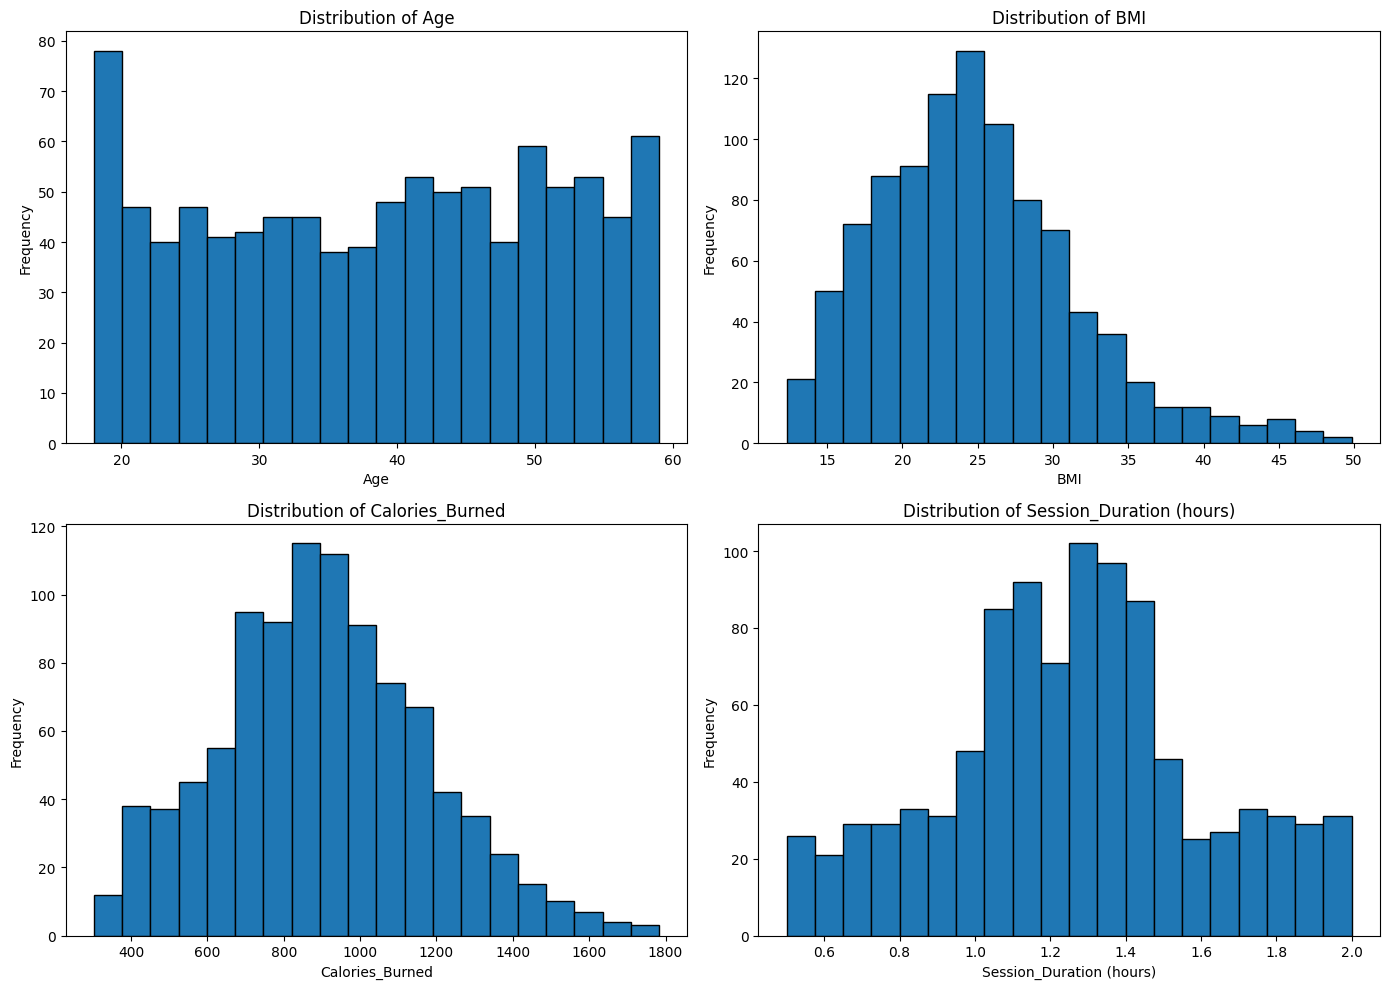

In [4]:
# Plot histograms for key variables to understand their distribution among the gym members.
# These variables include Age, BMI, Calories Burned, and Session Duration.

# Define features for visualization
features = ['Age', 'BMI', 'Calories_Burned', 'Session_Duration (hours)']

# Plot histograms for each feature
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.hist(gym_data[feature], bins=20, edgecolor='black')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## The histograms reveal the following patterns:

1. **Age**: The distribution is relatively uniform across the age range, with a slight concentration in the 30–50 age group.
2. **BMI**: Shows a peak around 20-30, which aligns with average adult BMI values.
3. **Calories Burned**: Appears normally distributed around 900 calories, with some sessions burning over 1500 calories.
4. **Session Duration**: Most sessions last between 1 to 1.5 hours, with fewer sessions extending up to 2 hours.


## Analysis of Relationships Between Key Features

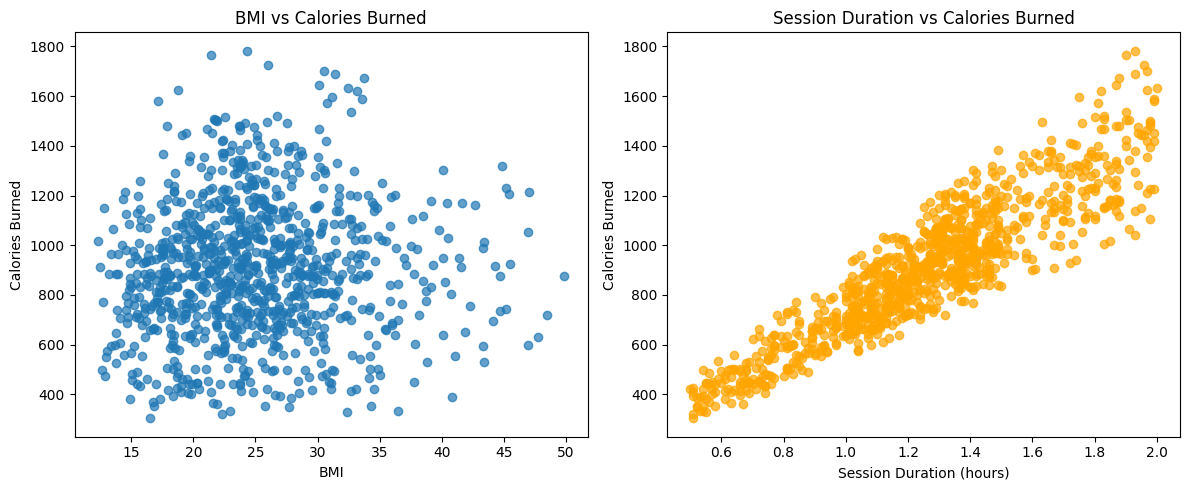

In [5]:
plt.figure(figsize=(12, 5))

# BMI vs Calories Burned
plt.subplot(1, 2, 1)
plt.scatter(gym_data['BMI'], gym_data['Calories_Burned'], alpha=0.7)
plt.title('BMI vs Calories Burned')
plt.xlabel('BMI')
plt.ylabel('Calories Burned')

# Session Duration vs Calories Burned
plt.subplot(1, 2, 2)
plt.scatter(gym_data['Session_Duration (hours)'], gym_data['Calories_Burned'], alpha=0.7, color='orange')
plt.title('Session Duration vs Calories Burned')
plt.xlabel('Session Duration (hours)')
plt.ylabel('Calories Burned')

plt.tight_layout()
plt.show()

The scatter plots reveal some interesting patterns:
1. **BMI vs. Calories Burned**: There is no strong linear relationship; however, individuals with a higher BMI generally show a wider range of calories burned, suggesting variations in workout intensity or type.

2. **Session Duration vs. Calories Burned**: There is a clear positive trend, where longer session durations tend to result in higher calories burned, which is expected given the extended activity.

## Analysis of Calories Burned by Categorical Variables

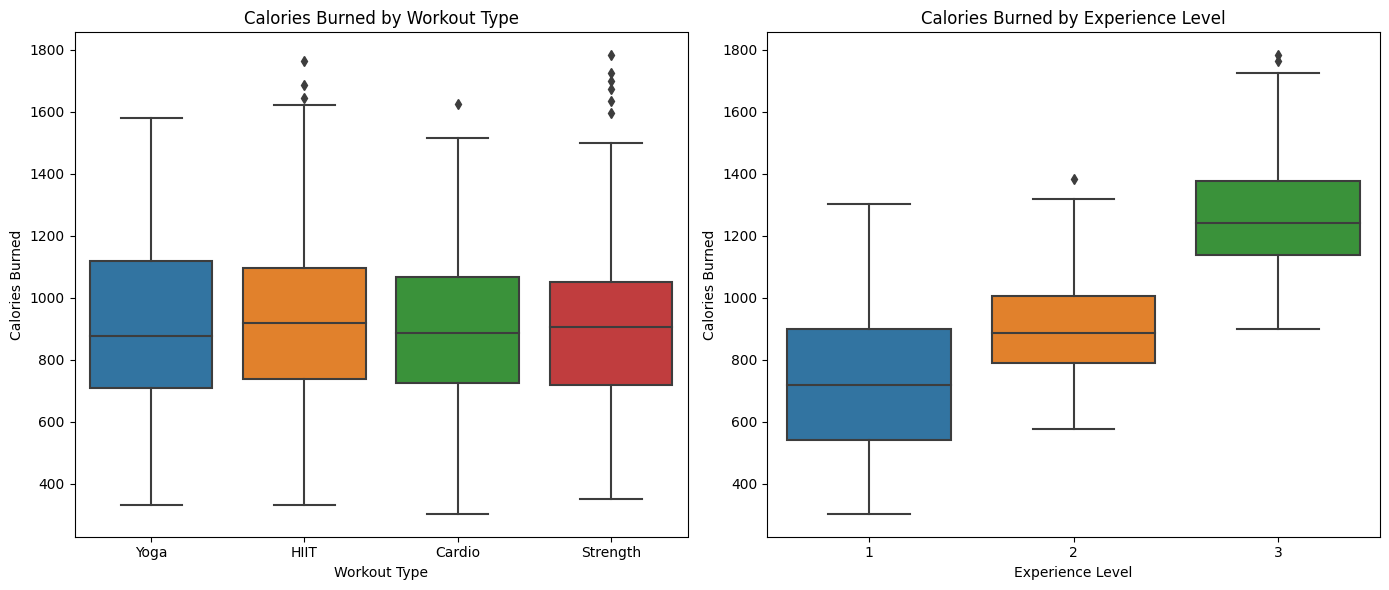

In [6]:
# Set up the figure for box plots
plt.figure(figsize=(14, 6))

# Calories burned by workout type
plt.subplot(1, 2, 1)
sns.boxplot(data=gym_data, x='Workout_Type', y='Calories_Burned')
plt.title('Calories Burned by Workout Type')
plt.xlabel('Workout Type')
plt.ylabel('Calories Burned')

# Calories burned by experience level
plt.subplot(1, 2, 2)
sns.boxplot(data=gym_data, x='Experience_Level', y='Calories_Burned')
plt.title('Calories Burned by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Calories Burned')

plt.tight_layout()
plt.show()

The box plots provide further insights:

1. **Calories Burned by Workout Type**: HIIT and Cardio workouts generally lead to higher calorie expenditure compared to Yoga and Strength workouts, which aligns with the typically higher intensity of HIIT and Cardio exercises.

2. **Calories Burned by Experience Level**: More experienced individuals (especially those at level 3) tend to burn slightly more calories on average, possibly due to higher intensity or efficiency in their workouts.

## Conclusions
## Based on the EDA conducted, we can draw some key insights:
1. **Age and BMI**: The members span a wide range of ages, primarily in the 30–50 range, with BMI clustering around 20-30.
2. **Calories Burned and Session Duration**: As expected, longer sessions tend to burn more calories.
3. **Workout Type**: HIIT and Cardio workouts generally lead to higher calorie burn compared to Yoga and Strength, consistent with the intensity of these exercise types.
4. **Experience Level**: More experienced individuals tend to burn slightly more calories on average, possibly due to more efficient or intense workouts.

## This EDA provides a strong foundation for further analysis, such as predictive modeling or clustering based on workout habits and fitness metrics.